# Error Bars

It is common practice in High Energy Physics (and other fields) to display error bars for each
 histogram bin, corresponding to either the associated statistical or systematic errors.  While the
 interpretation and meaning of the aforementioned error bars is a point of constant contention
 ([Those Deceiving Error Bars](http://www.science20.com/quantum_diaries_survivor/those_deceiving_error_bars-85735)), the entries in a histogram bin are typically seen as drawn     from a Poisson distribution, and thus the standard deviation for a bin with $N$ entries is $\sqrt{N}$.

 Drawing Error Bars
 ------------------

 Let us produce a simple histogram with error bars.

In [1]:
import numpy as np
from histogram_plus import hist
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

data = np.random.normal(size=1000)

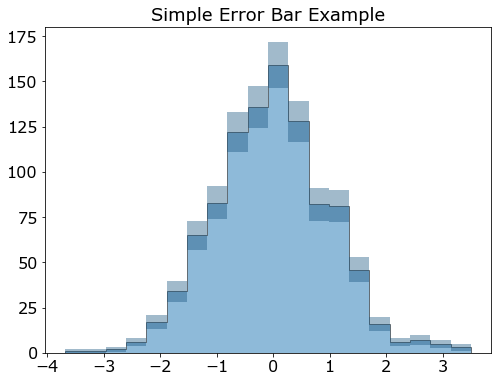

In [2]:
_ = hist(data, bins=20, errorbars=True)
plt.title('Simple Error Bar Example')

By default, when no weights are given, the error bars are calculated as $\pm\sqrt{N}$ above and below the bin height.  This is equivalent to using the argument `err_type='gaussian'` when calling the `hist` function.  If weights are included with the input data, then the default error bars are calculated as the root of the sum the square of the weights.  This is equivalent to declaring `err_type='sumW2'.

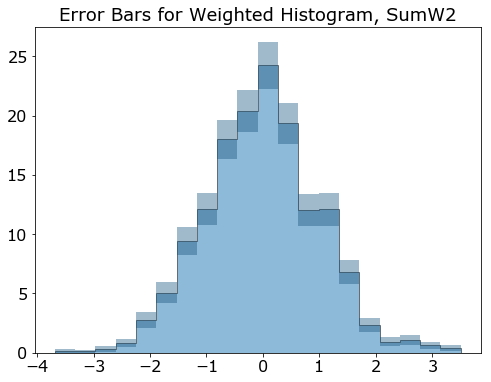

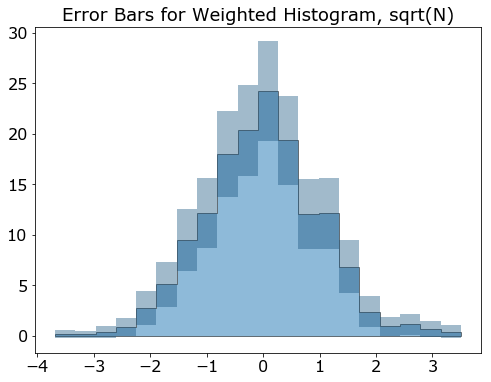

In [3]:
w = np.random.uniform(0.1, 0.2, size=1000)
_ = hist(data, bins=20, weights=w, errorbars=True)
plt.title('Error Bars for Weighted Histogram, SumW2')
plt.figure()
_ = hist(data, bins=20, weights=w, errorbars=True, err_type='gaussian')
plt.title('Error Bars for Weighted Histogram, sqrt(N)')
